<a href="https://colab.research.google.com/github/ClovisMonteiro/Data-solutions/blob/main/Task_1_Happy_Marriage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 - Happy Marriage.ipynb

This work objective is to find what are the ingredients to a happy marriage and what correlates with a happy marriage. To answer these questions we are going to use a dataset from the General Social Survey of 2006 

(http://www.thearda.com/Archive/Files/Codebooks/GSS2006_CB.asp).

*This is a typical data analysis problem but you are free to create simple models to predict happy marriage

### Import all required libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import os

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns

### Load Data

In [2]:
os.listdir("./drive/MyDrive/Data_Solutions/Happy_Marriage/")

['General_Social_Survey_2006.XLSX']

In [3]:
data = "./drive/MyDrive/Data_Solutions/Happy_Marriage/General_Social_Survey_2006.XLSX"

In [4]:
#list_columns = [ 'MARITAL','WIDOWED','SPHRS2','SPEVWORK','SPWRKSLF','PRAY','HAPMAR'] 

df = pd.read_excel(data) 

### Analyzing data

In [5]:
df.shape

# number of rows X columns

(4510, 1239)

In [6]:
df.describe()

# statistical values of dataset

,YEAR,ID,WRKSTAT,HRS1,HRS2,EVWORK,WRKSLF,WRKGOVT,OCC80,PREST80,INDUS80,MARITAL,AGEWED,DIVORCE,WIDOWED,SPWRKSTA,SPHRS1,SPHRS2,SPEVWORK,SPWRKSLF,SPOCC80,SPPRES80,SPIND80,PAWRKSLF,PAOCC80,PAPRES80,PAIND80,MAOCC80,MAPRES80,MAWRKSLF,MAIND80,SIBS,CHILDS,AGE,AGEKDBRN,EDUC,PAEDUC,MAEDUC,SPEDUC,DEGREE,...,DATEINTV,ISCO681,PAISC681,MAISC681,SPISC681,ISCO88,PAISCO88,MAISCO88,SPISCO88,SEI,PASEI,MASEI,SPSEI,COHORT,ZODIAC,INTHISP,INTRACE1,INTRACE2,INTRACE3,BALLOT,VERSION,ISSP,FORMWT,SAMPCODE,SAMPLE,OVERSAMP,PHASE,SPANSELF,SPANINT,SPANENG,WTSS,WTSSNR,WTSSALL,I_AGE,I_ATTEND,I_EDUC,I_GENDER,I_RELIGION,I_REGION,I_RACE
count,4510.0,4510.000000,4510.000000,2765.000000,88.000000,1522.000000,4323.000000,4323.000000,4323.000000,4510.000000,4323.000000,4510.000000,1168.000000,2542.000000,3064.000000,2176.000000,1434.000000,35.000000,699.000000,2045.000000,2045.000000,1998.000000,2045.000000,2461.000000,4510.000000,2369.000000,4510.000000,4510.000000,1795.000000,1873.000000,4510.000000,2992.000000,4510.000000,4510.000000,2162.000000,4510.000000,4510.000000,4510.000000,4510.000000,4510.000000,...,4510.000000,4270.000000,2369.000000,1795.000000,1997.000000,4270.000000,2369.000000,1795.000000,1997.000000,4242.000000,2311.000000,1787.000000,1977.000000,4510.000000,4510.000000,4510.000000,4510.000000,234.000000,25.000000,4510.000000,4510.000000,1518.0,4510.0,4510.000000,4510.0,4510.0,4510.000000,4510.000000,277.000000,4510.000000,4510.000000,4510.000000,4510.000000,4492.000000,4491.000000,4507.000000,4510.000000,4484.000000,4510.000000,4510.000000
mean,2006.0,2255.500000,2.949224,42.608318,42.443182,1.149146,1.907703,1.910248,365.560722,41.817073,614.019431,2.478049,23.782534,1.757278,1.994125,2.814338,43.313110,60.085714,1.333333,1.954034,374.005379,45.493493,596.880685,1.823243,256.539246,43.414943,237.991574,165.747450,41.623398,2.008542,270.246341,3.886698,1.918625,47.348559,24.360777,13.501996,54.129933,47.150998,71.076718,1.542129,...,467.352772,4503.076347,5901.628957,4375.019499,4563.168252,4641.130679,5546.142676,4948.193315,4672.682023,49.409595,46.927131,44.135478,50.987709,1990.947672,9.666075,2.433703,2.043459,12.170940,73.560000,2.672506,4.659424,1.0,1.0,534.900443,9.0,1.0,1.193792,0.159202,1.851986,1.061419,1.000490,1.000029,1.000003,2.666963,3.791138,1.537164,1.555876,1.978368,2.679823,1.403104
std,0.0,1302.069187,2.418023,15.181068,17.878169,0.557740,0.530463,0.898502,252.646683,16.848167,279.116748,1.665624,8.445032,0.576750,0.407205,2.454645,15.268118,28.772302,1.116003,0.764833,271.349931,14.240537,292.134220,0.888067,314.198540,12.978984,326.380854,257.910422,14.622820,0.966275,363.645474,4.705311,1.722429,17.174680,8.229994,5.310736,43.036085,42.461025,38.715783,1.211087,...,132.046577,2934.758982,3089.061150,2628.459389,3093.260561,2576.349925,2809.203614,2564.314725,2676.326202,19.599476,18.972330,19.749892,19.965797,507.260994,17.298503,7.997694,6.643297,25.684213,41.799203,1.156935,2.174413,0.0,0.0,24.406580,0.0,0.0,0.395311,0.643939,0.355757,0.240124,0.602808,0.629053,0.603240,1.159298,2.436183,1.196099,0.496923,1.283477,0.991834,0.709402
min,2006.0,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,3.000000,0.000000,10.000000,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,3.000000,17.000000,10.000000,1.000000,0.000000,17.000000,0.000000,0.000000,17.000000,1.000000,0.000000,0.000000,0.000000,18.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,307.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,17.100000,17.100000,17.100000,17.100000,1917.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,501.000000,9.0,1.0,1.000000,0.000000,1.000000,1.000000,0.430000,0.360000,0.429700,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,2006.0,1128.250000,1.000000,38.000000,37.250000,1.000000,2.000000,2.000000,163.000000,31.000000,410.000000,1.000000,19.000000,1.000000,2.000000,1.000000,40.000000

In [7]:
df.info()

# dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4510 entries, 0 to 4509
Columns: 1239 entries, YEAR to I_RACE
dtypes: float64(1157), int64(82)
memory usage: 42.6 MB


In [8]:
df.isnull().any().describe()

count     1239
unique       2
top       True
freq      1154
dtype: object

In [72]:
df.dtypes.to_frame().T

,YEAR,ID,WRKSTAT,HRS1,HRS2,EVWORK,WRKSLF,WRKGOVT,OCC80,PREST80,INDUS80,MARITAL,AGEWED,DIVORCE,WIDOWED,SPWRKSTA,SPHRS1,SPHRS2,SPEVWORK,SPWRKSLF,SPOCC80,SPPRES80,SPIND80,PAWRKSLF,PAOCC80,PAPRES80,PAIND80,MAOCC80,MAPRES80,MAWRKSLF,MAIND80,SIBS,CHILDS,AGE,AGEKDBRN,EDUC,PAEDUC,MAEDUC,SPEDUC,DEGREE,...,PAISC681,MAISC681,SPISC681,ISCO88,PAISCO88,MAISCO88,SPISCO88,SEI,PASEI,MASEI,SPSEI,COHORT,ZODIAC,INTHISP,INTRACE1,INTRACE2,INTRACE3,BALLOT,VERSION,ISSP,FORMWT,SAMPCODE,SAMPLE,OVERSAMP,PHASE,SPANSELF,SPANINT,SPANENG,WTSS,WTSSNR,WTSSALL,I_AGE,I_ATTEND,I_EDUC,I_GENDER,I_RELIGION,I_REGION,I_RACE,HAPMAR2,HAPPY2
0,int64,int64,int64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,int64,float64,float64,int64,float64,int64,int64,float64,int64,int64,int64,int64,int64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,int64,int64,float64,int64,int64,int64,int64,int64,int64,float64,int64,float64,float64,float64,float64,float64,float64,int64,float64,int64,int64,object,object


In [10]:
df['ID'].sort_values().value_counts()

#  no duplicate id

2047    1
549     1
537     1
2588    1
541     1
       ..
1286    1
3331    1
1282    1
3327    1
2049    1
Name: ID, Length: 4510, dtype: int64

The analysis consists of looking for the **ingredients for a happy marriage** in the dataset. 

Getting the variable information that corresponds to a happy marriage in the **article informed**.


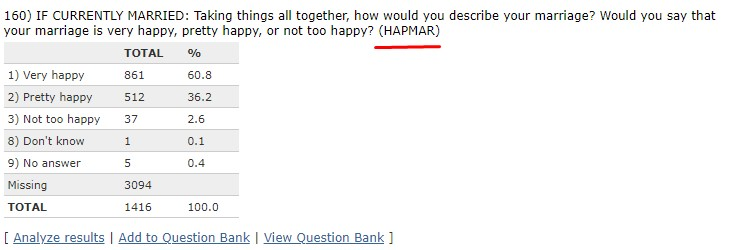

Link: https://www.thearda.com/Archive/Files/Codebooks/GSS2006_CB.asp
Question: 160



In [13]:
df['HAPMAR'].value_counts()

# Value counts of HAPMAR

Missing    3094
1.0         861
2.0         512
3.0          37
9.0           5
8.0           1
Name: HAPMAR, dtype: int64

In [11]:
# Removing missing values for analisys
df['HAPMAR'].fillna("Missing", inplace=True)

In [12]:
conditions = {1:'Very happy',2:'Pretty happy', 3:'Not too happy',8:"Don't know",9:'No answer','Missing': 'Missing' }

df['HAPMAR2'] = df['HAPMAR'].map(conditions)

In [14]:
an_values = df['HAPMAR2'].value_counts().to_frame().reset_index()
an_values.columns = ['HAPMAR2', 'Value_counts']
an_values.head()

# Identifying the data with options

,HAPMAR2,Value_counts
0,Missing,3094
1,Very happy,861
2,Pretty happy,512
3,Not too happy,37
4,No answer,5


Text(0.5, 1.0, 'Graph with answered values')

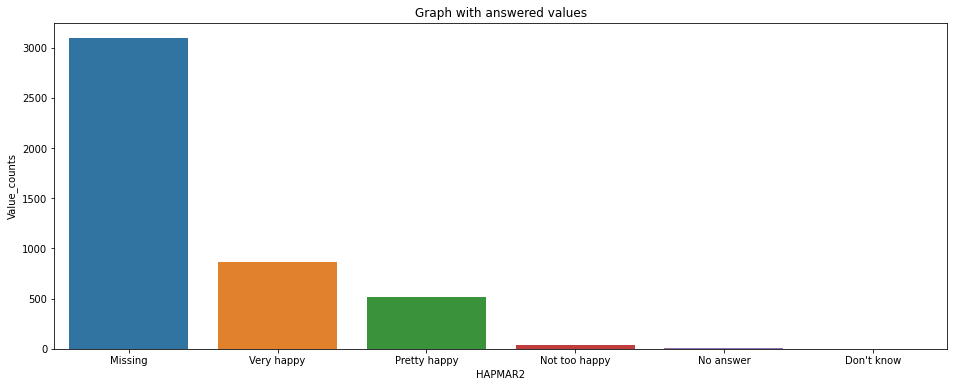

In [15]:
plt.figure(figsize=(16, 6))
sns.barplot(x ="HAPMAR2", y="Value_counts", data = an_values)
plt.title('Graph with answered values')


In [16]:
an_values2 = an_values[1:]

Text(0.5, 1.0, 'Chart without missing data')

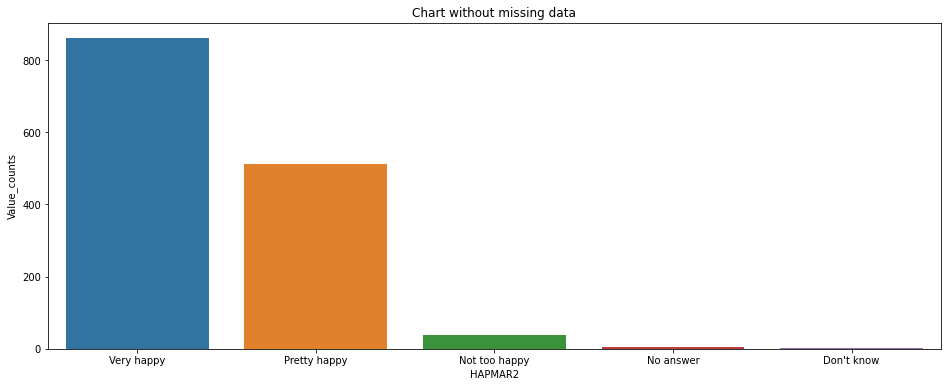

In [17]:
plt.figure(figsize=(16, 6))
sns.barplot(x ="HAPMAR2", y="Value_counts", data = an_values2)
plt.title('Chart without missing data')

In [18]:
conditions = {1:'Very happy',2:'Pretty happy', 3:'Not too happy',8:"Don't know", "":"Missing"}

df['HAPPY2'] = df['HAPPY'].map(conditions)

In [19]:
happy_values = df['HAPPY2'].value_counts().to_frame().reset_index()
happy_values.columns = ['HAPPY2', 'Value_counts']
happy_values.head()

,HAPPY2,Value_counts
0,Pretty happy,1676
1,Very happy,920
2,Not too happy,390
3,Don't know,6


Text(0.5, 1.0, 'Chart with all data of happiness peoples')

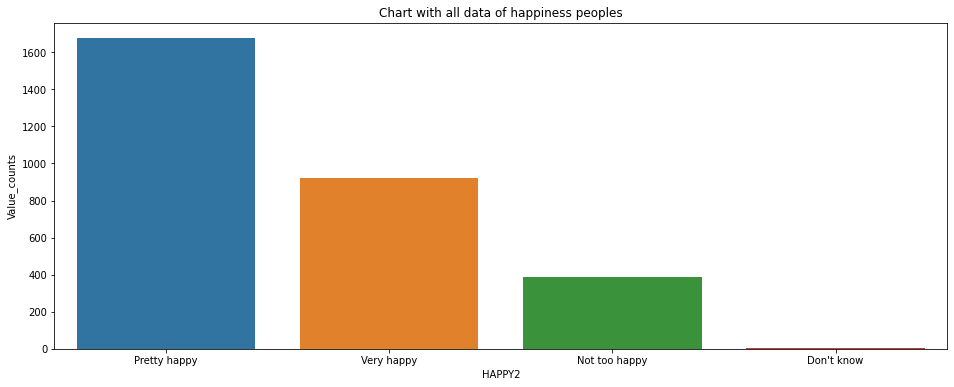

In [20]:
plt.figure(figsize=(16, 6))
sns.barplot(x ="HAPPY2", y="Value_counts", 
            data = happy_values)

plt.title("Chart with all data of happiness peoples")

In [21]:
marriage = df.query("'Missing' not in HAPMAR")

In [22]:
marriage.shape

(1416, 1241)

In [23]:
marriage = marriage.dropna(axis=1).copy()

In [24]:
marriage.shape

(1416, 132)

In [25]:
happy_marriage = marriage['HAPPY2'].value_counts().to_frame().reset_index()
happy_marriage.columns = ['HAPPY2', 'Value_counts']
happy_marriage.head()

,HAPPY2,Value_counts
0,Pretty happy,720
1,Very happy,601
2,Not too happy,94
3,Don't know,1


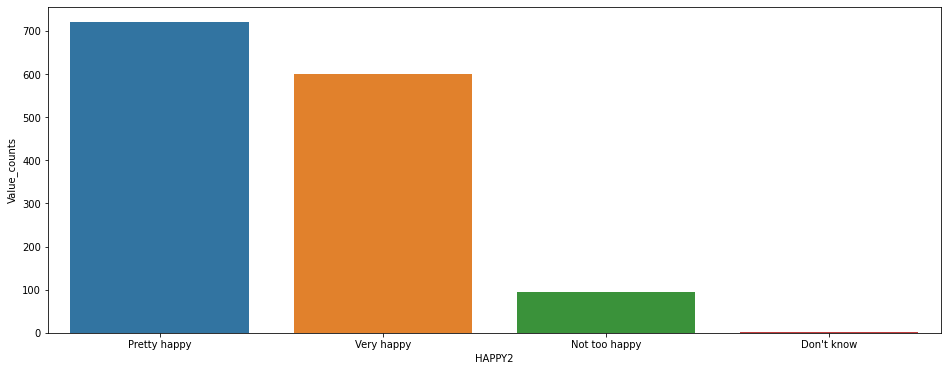

In [26]:
plt.figure(figsize=(16, 6))
sns.barplot(x ="HAPPY2", y="Value_counts", data = happy_marriage)

# Chart with data from married people  

In [27]:
df.shape, marriage.shape

((4510, 1241), (1416, 132))

Text(0.5, 1.0, 'DataFrame Completed X People who responded about marriage ')

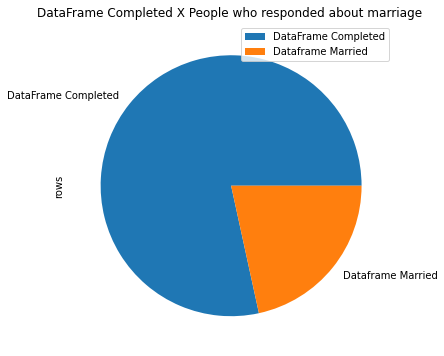

In [67]:
pie_plot_cf = pd.DataFrame({'rows': [4510, 1241],
                   'columns': [1416, 132]},
                  index=['DataFrame Completed', 'Dataframe Married'])

plot = pie_plot_cf.plot.pie(y='rows', figsize=(16, 6))

plt.title("DataFrame Completed X People who responded about marriage ")

Text(0.5, 1.0, 'DataFrame Completed X People married ')

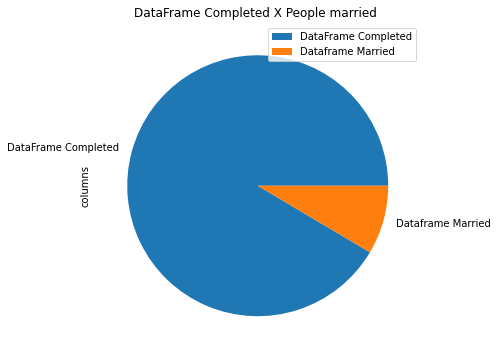

In [68]:
pie_plot_cf = pd.DataFrame({'rows': [4510, 1241],
                            'columns': [1416, 132]},
                            index=['DataFrame Completed', 'Dataframe Married'])

plot = pie_plot_cf.plot.pie(y='columns', figsize=(16, 6))
plt.title("DataFrame Completed X People married ")

 - Quantas pessoas casadas já se divorciaram?
 - Quantas pessoas felizes ou muito felizes são divorciadas?
 - quantas pessoas divorciadas existem no contexto geral?

### Feature 1

In [30]:
df2 = df.query("'Missing' not in HAPMAR")

In [31]:
df2

,YEAR,ID,WRKSTAT,HRS1,HRS2,EVWORK,WRKSLF,WRKGOVT,OCC80,PREST80,INDUS80,MARITAL,AGEWED,DIVORCE,WIDOWED,SPWRKSTA,SPHRS1,SPHRS2,SPEVWORK,SPWRKSLF,SPOCC80,SPPRES80,SPIND80,PAWRKSLF,PAOCC80,PAPRES80,PAIND80,MAOCC80,MAPRES80,MAWRKSLF,MAIND80,SIBS,CHILDS,AGE,AGEKDBRN,EDUC,PAEDUC,MAEDUC,SPEDUC,DEGREE,...,PAISC681,MAISC681,SPISC681,ISCO88,PAISCO88,MAISCO88,SPISCO88,SEI,PASEI,MASEI,SPSEI,COHORT,ZODIAC,INTHISP,INTRACE1,INTRACE2,INTRACE3,BALLOT,VERSION,ISSP,FORMWT,SAMPCODE,SAMPLE,OVERSAMP,PHASE,SPANSELF,SPANINT,SPANENG,WTSS,WTSSNR,WTSSALL,I_AGE,I_ATTEND,I_EDUC,I_GENDER,I_RELIGION,I_REGION,I_RACE,HAPMAR2,HAPPY2
5,2006,6,1,37.0,NaN,NaN,2.0,2.0,375.0,47,711.0,1,NaN,2.0,2.0,1.0,40.0,NaN,NaN,2.0,426.0,42.0,350.0,NaN,0,NaN,0,808,32.0,2.0,931,0.0,2,35,28.0,16,97,12,10,3,...,NaN,9851.0,5890.0,3417.0,NaN,8323.0,5169.0,54.7,NaN,29.8,39.4,1971,12,1,1,NaN,NaN,2,2,NaN,1,501,9,1,2,0,NaN,1,1.91,2.16,1.9096,2.0,2.0,3.0,2,1.0,1,3,Pretty happy,Pretty happy
14,2006,15,7,NaN,NaN,1.0,2.0,2.0,796.0,36,660.0,1,NaN,2.0,2.0,1.0,40.0,NaN,NaN,2.0,808.0,32.0,842.0,2.0,176,69.0,880,274,32.0,2.0,691,8.0,7,34,20.0,13,15,12,15,1,...,1410.0,4519.0,9851.0,8290.0,2460.0,5220.0,8323.0,32.0,73.9,38.9,29.8,1972,7,1,1,NaN,NaN,2,2,NaN,1,501,9,1,2,0,NaN,1,1.91,2.16,1.9096,2.0,7.0,1.0,2,3.0,1,1,Very happy,Very happy
26,2006,27,7,NaN,NaN,1.0,1.0,2.0,406.0,29,761.0,1,NaN,2.0,2.0,1.0,40.0,NaN,NaN,2.0,37.0,49.0,212.0,2.0,73,73.0,112,0,NaN,NaN,0,10.0,3,52,16.0,5,12,12,14,0,...,110.0,NaN,2190.0,5131.0,2113.0,NaN,1229.0,30.8,86.8,NaN,68.1,1954,8,1,2,NaN,NaN,3,6,NaN,1,501,9,1,1,0,NaN,1,0.86,0.97,0.8593,3.0,5.0,0.0,2,1.0,1,3,Pretty happy,Pretty happy
28,2006,29,5,NaN,NaN,1.0,2.0,2.0,379.0,34,700.0,1,NaN,2.0,2.0,1.0,40.0,NaN,NaN,2.0,465.0,42.0,401.0,NaN,0,NaN,0,469,25.0,2.0,771,11.0,1,62,24.0,12,97,8,12,0,...,NaN,5900.0,5990.0,4100.0,NaN,5100.0,9152.0,37.7,NaN,34.4,63.5,1944,1,1,1,NaN,NaN,1,4,NaN,1,501,9,1,1,0,NaN,1,0.86,0.97,0.8593,4.0,7.0,0.0,2,1.0,1,2,Very happy,Pretty happy
34,2006,35,1,40.0,NaN,NaN,2.0,2.0,319.0,39,812.0,1,NaN,2.0,2.0,1.0,40.0,NaN,NaN,2.0,869.0,36.0,60.0,2.0,999,NaN,502,0,NaN,NaN,0,2.0,3,31,23.0,12,12,12,12,1,...,NaN,NaN,9594.0,4222.0,NaN,NaN,9313.0,36.5,NaN,NaN,28.6,1975,1,1,1,NaN,NaN,2,2,NaN,1,501,9,1,1,0,NaN,1,0.86,0.97,0.8593,2.0,NaN,1.0,2,3.0,1,1,Very happy,Very happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4497,2006,4498,5,NaN,NaN,1.0,2.0,2.0,585.0,45,460.0,1,NaN,1.0,2.0,5.0,NaN,NaN,1.0,2.0,313.0,46.0,930.0,2.0,585,45.0,60,0,NaN,NaN,0,4.0,3,81,18.0,11,7,12,12,0,...,8719.0,NaN,3211.0,7136.0,7136.0,NaN,4115.0,38.1,38.1,NaN,38.4,1925,12,1,1,NaN,NaN,1,1,NaN,1,549,9,1,1,0,NaN,1,0.86,0.79,0.8593,5.0,1.0,0.0,1,1.0,4,1,Pretty happy,Very happy
4498,2006,4499,5,NaN,NaN,1.0,2.0,2.0,203.0,68,999.0,1,NaN,1.0,2.0,5.0,NaN,NaN,1.0,1.0,275.0,34.0,771.0,1.0,526,38.0,752,444,17.0,2.0,842,1.0,1,64,22.0,12,12,12,14,1,...,8540.0,5300.0,4519.0,3211.0,7241.0,5120.0,5220.0,64.8,38.8,29.0,33.9,1942,6,1,1,NaN,NaN,2,2,NaN,1,549,9,1,1,0,NaN,1,0.86,0.79,0.8593,4.0,7.0,1.0,2,1.0,4,1,Pretty happy,Pretty happy
4499,2006,4500,7,NaN,NaN,1.0,2.0,1.0,453.0,22,842.0,1,NaN,2.0,2.0,1.0,50.0,NaN,NaN,2.0,274.0,32.0,580.0,2.0,253,45.0,711,406,29.0,1.0,761,6.0,8,47,20.0,14,18,18,16,1,...,4419.0,5401.0,4519.0,9140.0,3412.0,5131.0,5220.0,28.4,65.8,30.8,38.9,1959,2,1,1,NaN,NaN,1,4,NaN,1,549,9,1,1,0,NaN,1,0.86,0.79,0.8593,3.0,7.0,1.0,2,1.0,4,1,Very happy,Very happy
4501,2006,4502,1,48.0,NaN,NaN,2.0,2.0,406.0,29,761.0,1,NaN,2.0,2.0,8.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,473,40.0,11,0,NaN,NaN,0,4.0,8,61,16.0,1,99,2,0,0,...,6110.0,NaN,NaN,5131.0,6133.0,NaN,NaN,30.8,37.3,NaN,NaN,1945,12,2,1,NaN,NaN,2,2,NaN,1,550,9,1,1,3,2.0,2,0.86,0.76,0.8593,4.0,3.0,0.0,2,2.0,4,3,Pretty happy,Not too happy


In [32]:
df2 = df2.dropna(axis=1).copy()

In [33]:
df2['HAPMAR'] = pd.Series(df2['HAPMAR'], dtype="category")          

In [34]:
df2['HAPMAR'].value_counts()

1.0    861
2.0    512
3.0     37
9.0      5
8.0      1
Name: HAPMAR, dtype: int64

In [35]:
series = df2['HAPMAR']

data_corr = df2.corrwith(series)

In [36]:
data_corr = pd.DataFrame(data_corr)

In [37]:
data_corr = data_corr.reset_index()

In [38]:
data_corr.columns = ['column', 'value_corr']

In [39]:
data_corr = data_corr.sort_values('value_corr', ascending=False)

In [40]:
data_corr.iloc[0:20]

,column,value_corr
4,MARITAL,0.371238
63,HAPPY,0.340677
109,COHORT,0.140301
66,SATFIN,0.132993
96,MAR1,0.128412
128,I_RACE,0.120431
21,RACE,0.120431
70,COOP,0.119099
91,RACECEN1,0.112065
15,SPEDUC,0.104804


In [41]:
data_test = df2[['MARITAL', 'HAPPY', 'COHORT', 'HAPMAR']]

In [42]:
data_test.corr()

,MARITAL,HAPPY,COHORT
MARITAL,1.000000,0.001168,0.514949
HAPPY,0.001168,1.000000,-0.046311
COHORT,0.514949,-0.046311,1.000000


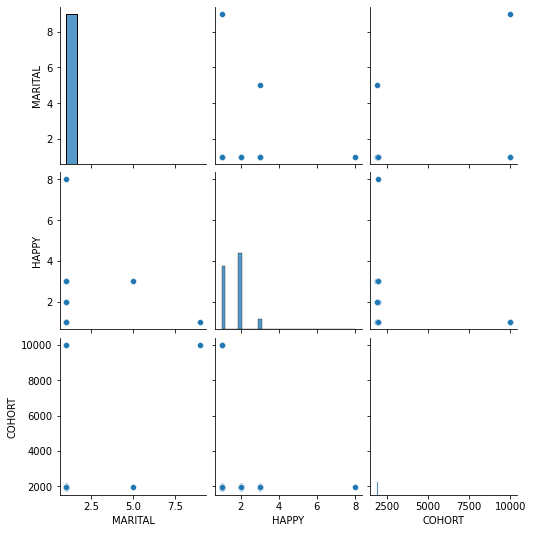

In [43]:
ax = sns.pairplot(data_test)

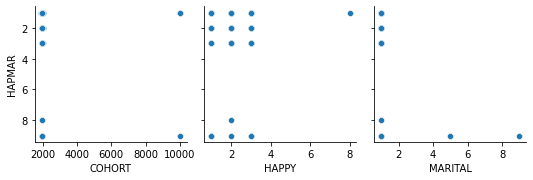

In [44]:
ax = sns.pairplot(data_test, y_vars='HAPMAR', x_vars=['COHORT', 'HAPPY', 'MARITAL'])

In [45]:
data_corr.iloc[0:4].sum()

column        MARITALHAPPYCOHORTSATFIN
value_corr                    0.985209
dtype: object

In [46]:
data_corr.iloc[0:8]

# ingredients of a happy marriage

,column,value_corr
4,MARITAL,0.371238
63,HAPPY,0.340677
109,COHORT,0.140301
66,SATFIN,0.132993
96,MAR1,0.128412
128,I_RACE,0.120431
21,RACE,0.120431
70,COOP,0.119099


Text(0.5, 1.0, 'ingredients for a happy marriage ')

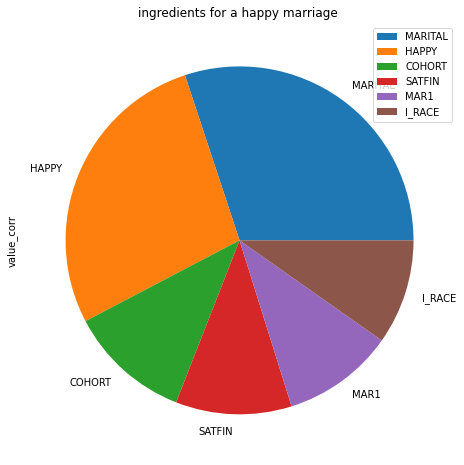

In [47]:
pie_plot_cf = pd.DataFrame({'value_corr': [0.371238, 0.340677, 0.140301, 0.132993, 0.128412, 0.120431]},
                            index=['MARITAL', 'HAPPY', 'COHORT', 'SATFIN', 'MAR1', 'I_RACE'])

plot = pie_plot_cf.plot.pie(y='value_corr', figsize=(20, 8))
plt.title("ingredients for a happy marriage ")

In [48]:
df_new = df2[["HAPMAR",'MARITAL', 'HAPPY', 'COHORT', 'SATFIN', 'I_RACE']]

In [49]:
df_new

,HAPMAR,MARITAL,HAPPY,COHORT,SATFIN,I_RACE
5,2.0,1,2.0,1971,3.0,3
14,1.0,1,1.0,1972,2.0,1
26,2.0,1,2.0,1954,2.0,3
28,1.0,1,2.0,1944,3.0,2
34,1.0,1,1.0,1975,2.0,1
...,...,...,...,...,...,...
4497,2.0,1,1.0,1925,1.0,1
4498,2.0,1,2.0,1942,1.0,1
4499,1.0,1,1.0,1959,1.0,1
4501,2.0,1,3.0,1945,2.0,3


In [50]:
df_new.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
MARITAL,1416.0,1.01,0.24,1.0,1.0,1.0,1.0,9.0
HAPPY,1416.0,1.65,0.63,1.0,1.0,2.0,2.0,8.0
COHORT,1416.0,1974.64,370.19,1917.0,1947.0,1959.0,1970.0,9999.0
SATFIN,1416.0,1.89,0.86,1.0,1.0,2.0,2.0,9.0
I_RACE,1416.0,1.36,0.71,1.0,1.0,1.0,1.0,3.0


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor

In [52]:
y = df_new['HAPMAR']

In [53]:
X = df_new.drop(columns=['HAPMAR']).copy()

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [55]:
#model = LinearRegression()
model = RandomForestRegressor(n_estimators=100)

In [56]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [57]:
print('R² = {}'.format(model.score(X_train, y_train).round(2)))

R² = 0.66


In [59]:
y_previsto = model.predict(X_test)

In [60]:
marital = 1
happy = 2 
cohort = 1950
satfin = 2
race = 5

predict_test =[[marital, happy, cohort, satfin, race]]

print('$ {0:.0f}'.format(model.predict(predict_test)[0]))

$ 2


In [61]:
R2 = model.score(X_train, y_train).round(2)
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)


pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Metrics'])

,Metrics
EQM,0.54
REQM,0.73
R²,0.66


In [62]:
# Save model using picle
import pickle

output = open('model_happyMarriage', 'wb')
pickle.dump(model, output)
output.close()

In [63]:
# load model in other jupyter notebook

import pickle

model = open('model_happyMarriage','rb')
lm_new = pickle.load(model)
model.close()

In [64]:
# test unique
marital = 1
happy = 2 
cohort = 1950
satfin = 2
race = 5

predict_test =[[marital, happy, cohort, satfin, race]]

In [65]:
from ipywidgets import widgets, HBox, VBox
from IPython.display import display

marital = widgets.Text(description="Marital")
happy = widgets.Text(description="Happy")
cohort = widgets.Text(description="Year of birth")
satfin = widgets.Text(description="satfin")
race = widgets.Text(description="Race")
btn = widgets.Button(description="Start simulator")

left = VBox([marital, happy, cohort])
right = VBox([satfin, race])
inputs = HBox([left, right])

def Simulator(sender):
    input=[[
                float(marital.value if marital.value else 0), 
                float(happy.value if happy.value else 0), 
                float(cohort.value if cohort.value else 0), 
                float(satfin.value if satfin.value else 0),
                float(race.value if race.value else 0)
             ]]
    print('$ {0:.0f}'.format(lm_new.predict(input)[0]))
    result = '{0:.0f}'.format(lm_new.predict(input)[0])
    if(result=='1'):
      print("Marriage very happy")
    elif(result=='2'):
      print("Marriage pretty happy")
    elif(result=='3'):
      print("Marriage not too happy")
    else:
      print("Marriage no happy")

    
btn.on_click(Simulator)    

  - Marital                     
(1) Married	- (2) Widowed	 -   (3) Divorced	-  (4) Separated	- (5) Never married

  - Happy                    
(1) Very happy	- (2) Pretty happy	- (3) Not too happy -	 (8) Don't know	

  - Financial situation  _ satfin                   
(1) Pretty well satisfied	- (2) More or less satisfied	- (3) Not satisfied at ll	 - (8) Don't know
  - Race                    
(1) White -	(2) Black	-  (3) Other



In [71]:
display(inputs,btn)


# test model simulator

Button(description='Start simulator', style=ButtonStyle())